In [8]:
from importlib import reload
import read_csv_data

read_csv_data = reload(read_csv_data)

csv_file_path = 'data/nba_players/all_seasons.csv'

player_names_heights = read_csv_data.extract_nba_player_names_heights(csv_file_path)


In [9]:
print(len(player_names_heights))

len(list(player_names_heights.values())[:])

for k in player_names_heights.keys():
    if player_names_heights[k] > 231:
        print(k, player_names_heights[k])


2553
Gheorghe Muresan 231.14
dummy tall 240.0


In [38]:
import generator
generator = reload(generator)

hist_gen = generator.HistogramGenerator()
hist_gen.build(data=list(player_names_heights.values()))

prob = hist_gen.get_probability(205.0)
print(prob)

# Now that we've built a generator, let's generate some samples
sample_count = 3000

samples = []

from tqdm import tqdm
# for i in tqdm(range(sample_count), desc="Generating samples"):
for i in range(sample_count):
    sample = hist_gen.generate()
    samples.append(sample)

import numpy as np
data = np.array(samples)
bins = 8

print(samples[:10])
print(type(data))

0.03983548766157462
[189.47212815959665, 198.93171243153523, 209.8442484216814, 200.5515752076506, 198.29786530429863, 194.91385521186447, 199.96427379062416, 192.6162716119009, 183.8354060955376, 207.26969030460296]
<class 'numpy.ndarray'>


0.00014 * 9.82
0.00170 * 9.82
0.01334 * 9.82
0.03152 * 9.82
0.03977 * 9.82
0.01408 * 9.82
0.00109 * 9.82
0.00017 * 9.82
1.0
bin_edges2: [161.27116499 171.09439941 180.91763383 190.74086825 200.56410267
 210.38733709 220.21057151 230.03380593 239.85704035]
[161.27116499381282, 166.25892390509375, 170.6626088473685, 170.91001740354113, 172.06364733498302, 172.41081288822878, 172.5139766676208, 172.89437879235285, 173.23518618826049, 173.24635373534093, 173.51573715568298, 173.55452988313743, 173.91745665661963, 174.19252559323473, 175.34306997837317, 175.7413754898021, 176.01495376349155, 176.18856664166532, 176.76933317788513, 176.86707461443513, 178.40772480503347, 178.45863337112556, 178.48066370151707, 178.75166455542467, 178.77772811577256, 179.2517793113821, 180.00227341352294, 180.03259625315036, 180.08066705682046, 180.08551993217128, 180.11492346205083, 180.1203970245379, 180.19505605338642, 180.20930923216144, 180.22095279386548, 180.22864810378877, 180.24296187686076, 180.3122

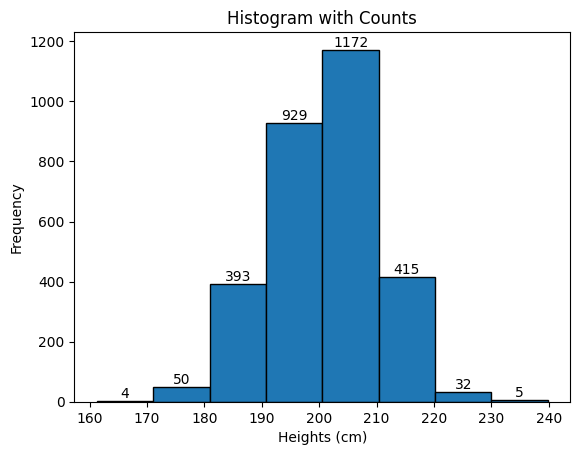

In [39]:

# when you set density=True, the total area under the histogram will sum to 1
probs, bin_edges2 = np.histogram(data, bins=bins, density=True)

sum_probs = 0.0
for i, prob in enumerate(probs):
    bin_width = (bin_edges2[i+1] - bin_edges2[i])
    sum_probs += prob * bin_width
    print(f'{prob:.5f} * {bin_width:.2f}')

print(sum_probs)

print('bin_edges2:', bin_edges2)

print(sorted(data))
print('min:', min(data))
print('max:', max(data))

# patches represent the individual bars (rectangles) of the histogram
import matplotlib.pyplot as plt

hist, bins, patches = plt.hist(data, bins=bins, edgecolor='black')

# Annotate each bar with the count
for patch, count in zip(patches, hist):
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        f'{int(count)}',
        ha='center',
        va='bottom'
    )

# Adding titles and labels
plt.title('Histogram with Counts')
plt.xlabel('Heights (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example data set
height_data = list(player_names_heights.values())[:]
data = np.array(height_data)

print(type(height_data[0]))
print(data.dtype)

# Manually insert two data points into data
# to make the visualization cleaner..
# data = np.append(data, 160.0)
# data = np.append(data, 240.0)

# Number of bins
bins = 8

# Calculate histogram
# when you set density=False, the first value of the tuple will be the counts of the bins
counts, bin_edges1 = np.histogram(data, bins=bins, density=False)

sum_counts = sum(counts)
print(sum_counts)
for count in counts:
    print(f'{count}')

print('bin_edges1:', bin_edges1)


# when you set density=True, the total area under the histogram will sum to 1
probs, bin_edges2 = np.histogram(data, bins=bins, density=True)

sum_probs = 0.0
for i, prob in enumerate(probs):
    bin_width = (bin_edges2[i+1] - bin_edges2[i])
    sum_probs += prob * bin_width
    print(f'{prob:.5f} * {bin_width:.2f}')

print(sum_probs)

print('bin_edges2:', bin_edges2)

print(sorted(data))
print('min:', min(data))
print('max:', max(data))




<class 'float'>
float64
2553
4
23
284
835
1017
369
19
2
bin_edges1: [160. 170. 180. 190. 200. 210. 220. 230. 240.]
0.00016 * 10.00
0.00090 * 10.00
0.01112 * 10.00
0.03271 * 10.00
0.03984 * 10.00
0.01445 * 10.00
0.00074 * 10.00
0.00008 * 10.00
1.0
bin_edges2: [160. 170. 180. 190. 200. 210. 220. 230. 240.]
[160.0, 160.02, 165.1, 167.64, 175.26, 175.26, 175.26, 175.26, 175.26, 175.26, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 177.8, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 180.34, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 182.88, 

In [11]:
print(type(bin_edges2), len(bin_edges2))
print(type(probs), len(probs))

<class 'numpy.ndarray'> 9
<class 'numpy.ndarray'> 8


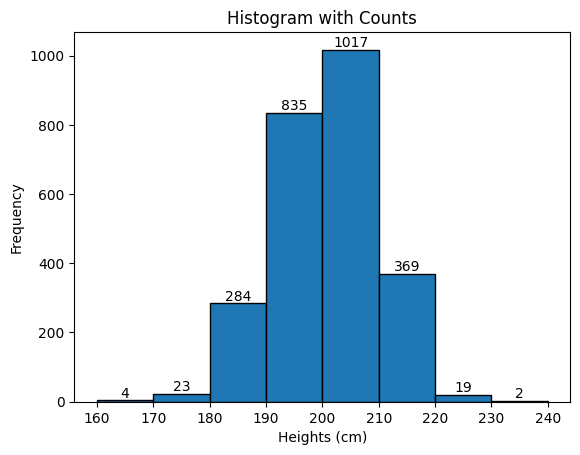

In [12]:
# # Plotting the histogram
# plt.hist(data, bins=bins, edgecolor='black')

# # Adding titles and labels
# plt.title('Histogram of Data')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

# # Showing the plot
# plt.show()

# Create histogram (with count labels ontop of each bar)
# 1. Create the histogram using plt.hist.
# 2. Iterate through the rectangles (bars) of the histogram.
# 3. Use plt.text to place the count on top of each bar

# patches represent the individual bars (rectangles) of the histogram
hist, bins, patches = plt.hist(data, bins=bins, edgecolor='black')

# Annotate each bar with the count
for patch, count in zip(patches, hist):
    plt.text(
        patch.get_x() + patch.get_width() / 2,
        patch.get_height(),
        f'{int(count)}',
        ha='center',
        va='bottom'
    )

# Adding titles and labels
plt.title('Histogram with Counts')
plt.xlabel('Heights (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.plot(bin_centers, counts, linestyle='-', marker='o')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data set
data = np.array([1, 2, 2, 2.5, 3, 4, 5, 6, 7, 8, 9, 10])

# Number of bins
bins = 10

# Calculate histogram
counts, bin_edges = np.histogram(data, bins=bins, density=True)

# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.plot(bin_centers, counts, linestyle='-', marker='o')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
plt.show()
